# Regressão Linear 

Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. 

## Imports
**Importe pandas, numpy, matplotlib,e seaborn. Em seguida, configure %matplotlib inline
(Você importará sklearn conforme você precisar).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obter dados

Trabalharemos com o arquivo csv do EcommerceCustomers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

**Leia no arquivo csv do EcommerceCustomers como um DataFrame chamado clientes.**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving EcommerceCustomers.csv to EcommerceCustomers.csv


In [4]:
customers = pd.read_csv("EcommerceCustomers.csv")

In [5]:
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


**Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe().**

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análise de dados exploratória

**Vamos explorar os dados!**

Pelo resto do exercício, só estaremos usando os dados numéricos do arquivo csv.
___
**Use seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido?**

In [8]:
sns.color_palette('ch:s=.25,rot=-25', as_cmap=True )
sns.set_style('whitegrid')

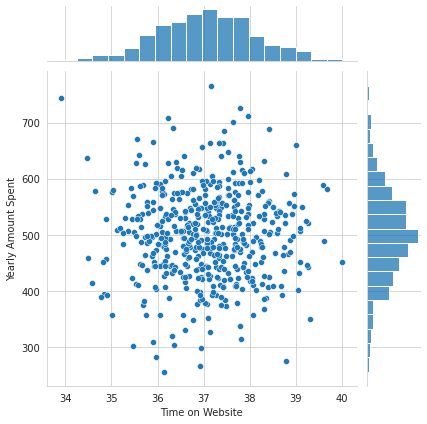

In [9]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data= customers)

**Faça o mesmo, mas com a coluna tempo no aplicativo (Time on App), em vez disso.**

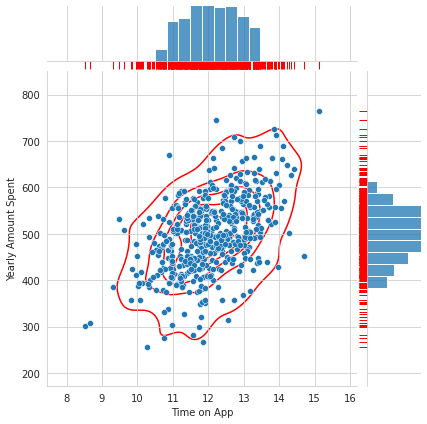

In [13]:
s = sns.jointplot(x='Time on App', y='Yearly Amount Spent', data= customers)
s.plot_joint(sns.kdeplot, color = 'r', zorder = 0, levels=6 )
s.plot_marginals(sns.rugplot, color = 'r', height=-.15, clip_on=False)

**Use jointplot criar um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership).**

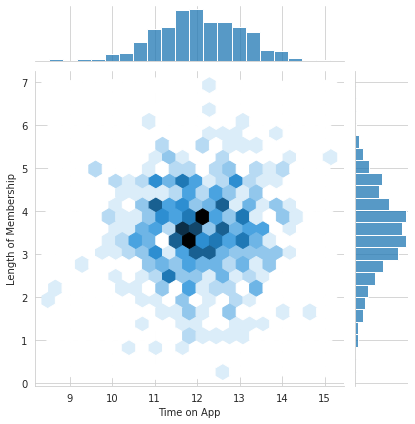

In [15]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind ='hex')

**Vamos explorar esses tipos de relações em todo o conjunto de dados. Use [parplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recriar o gráfico abaixo. (Não se preocupe com as cores)**

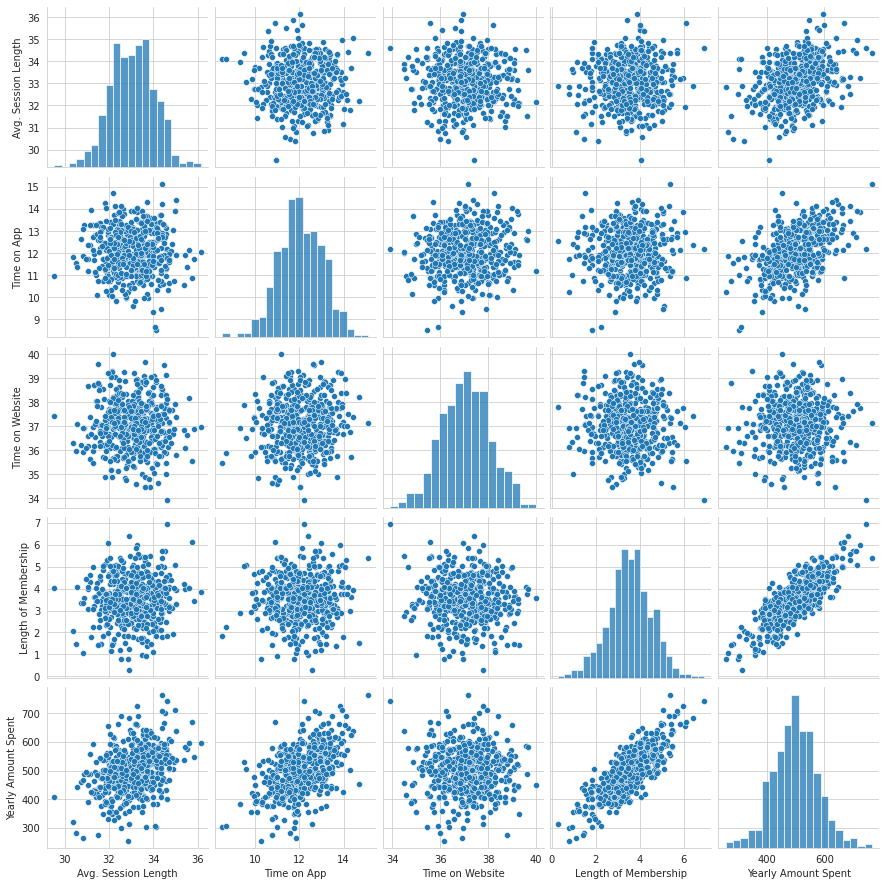

In [16]:
sns.pairplot(data = customers)

**Crie um plot de um modelo linear (usando o lmplot de Seaborn) da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership).**

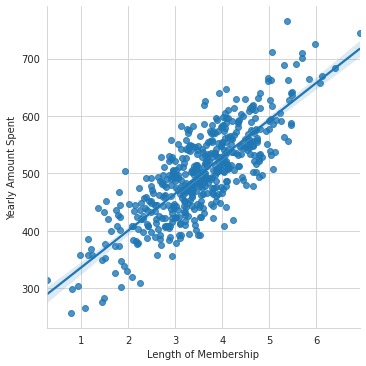

In [17]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data = customers)

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.
** Defina uma variável X igual a todas as características numéricas dos clientes e uma variável y igual à coluna Valor anual gasto (Yearly Amount Spent). **

In [19]:
y = customers['Yearly Amount Spent']

In [21]:
X = customers[['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership']]

**Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=101)

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

**Importe LinearRegression do sklearn.linear_model**

In [24]:
from sklearn.linear_model import LinearRegression

**Crie uma instância de um modelo LinearRegression () chamado lm.**

In [25]:
lm = LinearRegression()

**Treine lm nos dados de treinamento.**

In [26]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print os coeficientes do modelo**

In [28]:
lm.coef_

array([26.06944865, 38.67556383,  0.2518291 , 61.31057149])

In [29]:
lm.intercept_

-1054.2756810438846

## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

**Use lm.predict () para prever o conjunto X_test dos dados.**

In [30]:
predictions = lm.predict(X_test)

**Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.**

Text(0, 0.5, 'Predictions')

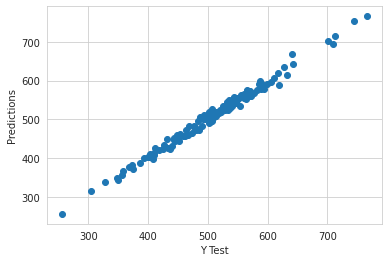

In [31]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz.

In [33]:
import sklearn.metrics as sm

In [51]:
print('Root Mean Square Error: ',round(np.sqrt(np.mean(predictions -y_test)**2),2))
print('Mean Square Error:', round(sm.mean_squared_error(y_test, predictions ),2))
print('Mean Absolut Error:', round(sm.mean_absolute_error(y_test, predictions ),2))
print('Median Absolut Error:', round(sm.median_absolute_error(y_test, predictions ),2))
print('Explain Variance Score:', round(sm.explained_variance_score(y_test, predictions)*100,2))
print('R2 score:', round(sm.r2_score(y_test, predictions)*100,2))

Root Mean Square Error:  0.79
Mean Square Error: 83.47
Mean Absolut Error: 7.42
Median Absolut Error: 6.61
Explain Variance Score: 98.9
R2 score: 98.89


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

**Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist ().**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


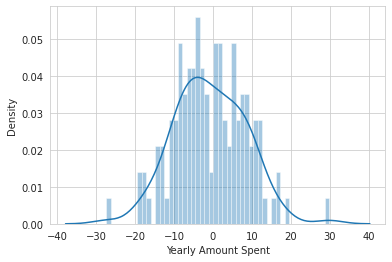

In [55]:
sns.distplot((y_test-predictions), bins =50)

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

**Recrie o quadro de dados abaixo.**

In [67]:
coeficientes = pd.DataFrame(lm.coef_, index= X.columns )

In [68]:
coeficientes

,0
Avg. Session Length,26.069449
Time on App,38.675564
Time on Website,0.251829
Length of Membership,61.310571


In [69]:
coeficientes.columns = ['Coeficientes']

In [70]:
coeficientes.rename(columns={'Coeficientes':'Coef'})

,Coef
Avg. Session Length,26.069449
Time on App,38.675564
Time on Website,0.251829
Length of Membership,61.310571


**Como você pode interpretar esses coeficientes?**

Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média de tempo de uso está associado a um aumento de 25,98 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo gasto no App está associado a um aumento de 38,59 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo no site está associado a um aumento de 0,19 dólares em dólares.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo de Associação está associado a um aumento de 61,27 dólares em dólares.

**Você acha que a empresa deve se concentrar mais em seu aplicativo móvel ou em seu site?**

Primeiramente, a empresa provevelmente deveria arranjar outras formas de fidelizar seu cliente, já que essa é a variável que mais ifluenciam os gastos dos seus usuários. Entre site e aplicativo, investiriamos no aplicavo, dado que o mesmo apresenta um coeficiente significativamente maior do que o site.